# Setup

## Imports

In [1]:
import pandas as pd

# Note that the following imports will always work provided the package has pip-installed and the corresponding environment is activated
from dsc.setup_python_project.pyscaffold_test.data import query_data_from_db, transform_data, mean_target_per_group
from dsc.setup_python_project.pyscaffold_test.model import SimpleLinearRegression
from dsc.setup_python_project.pyscaffold_test.plot import plot, plot_x_vs_yy

# Parameters

## Data

### Database connection

In [2]:
path2db = "../../../data/dsc.db"

### Sql query

In [3]:
sql_query = """
SELECT *
FROM broadcast
WHERE genre = 'Spielfilm'
    AND start_time_agf >= '2018-01-01'
    AND end_time_agf <= '2018-12-31'
"""

### Pd query

In [4]:
pd_query = "channel in 'RTL'"

### Target

In [5]:
target = 'duration'

### Feature

In [6]:
feature = 'month'

### Output

In [7]:
output = "prediction.csv"

## Model

In [8]:
Model = SimpleLinearRegression

# Data

## Load

In [9]:
load_data?

Object `load_data` not found.


In [10]:
df = query_data_from_db(sql_query, path2db)

In [11]:
df

,RUN_ID,TITLE_ID,TITLE,CHANNEL,START_TIME_AGF,END_TIME_AGF,WEEKDAY,DURATION,GENRE,REPEAT
0,649705,31400,Unternehmen Petticoat,ARD Das Erste,2018-01-01 03:00:00,2018-01-01 03:10:00,Mo,655,Spielfilm,nein
1,649708,31089,NOBODY IST DER GROESSTE,Kabel Eins,2018-01-01 03:00:00,2018-01-01 04:40:00,Mo,6126,Spielfilm,ja
2,649716,46257,Dallas Buyers Club,ARD Das Erste,2018-01-01 03:10:00,2018-01-01 05:00:00,Mo,6454,Spielfilm,nein
3,649723,43440,Sydney White - Campus Queen,ProSieben,2018-01-01 04:20:00,2018-01-01 06:00:00,Mo,5989,Spielfilm,ja
4,649725,31854,Die Superbullen,Kabel Eins,2018-01-01 04:40:00,2018-01-01 06:00:00,Mo,4675,Spielfilm,nein
...,...,...,...,...,...,...,...,...,...,...
5351,739275,54732,PASSAGIER 23 - VERSCHWUNDEN AUF HOHER SEE,RTL,2018-12-30 00:20:00,2018-12-30 02:35:00,So,6963,Spielfilm,nein
5352,739284,30589,EDGAR WALLACE: DAS INDISCHE TUCH,Kabel Eins,2018-12-30 01:40:00,2018-12-30 02:55:00,So,4237,Spielfilm,ja
5353,739285,36273,Ring 2,ProSieben,2018-12-30 01:55:00,2018-12-30 02:55:00,So,3038,Spielfilm,nein
5354,739290,48354,The Boy Next Door,RTL,2018-12-30 02:35:00,2018-12-30 02:55:00,So,1272,Spielfilm,ja


## Transform

In [12]:
df = transform_data(
    df,
    columns2lower=True,
    freq_col=feature,
    query=pd_query)

## Aggregate

In [13]:
mean_duration_per_month = mean_target_per_group(
    df,
    group_cols=feature,
    target=target)

In [14]:
mean_duration_per_month

,month,duration
0,1,5232.111111
1,2,5786.000000
2,3,5496.611111
3,4,5371.708333
4,5,5386.458333
5,6,4301.666667
6,7,4719.040000
7,8,4566.000000
8,9,4958.571429
9,10,5384.272727


## Visualize

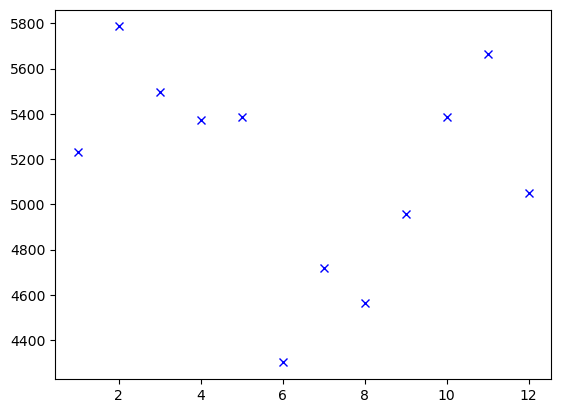

In [16]:
plot(mean_duration_per_month[feature], mean_duration_per_month[target])

# Model

## Fit

In [17]:
y = mean_duration_per_month[target]
X = mean_duration_per_month[feature]

In [18]:
model = Model().fit(X, y)

## Predict in-sample

In [19]:
in_sample_pred = model.predict(X)

## Visualize

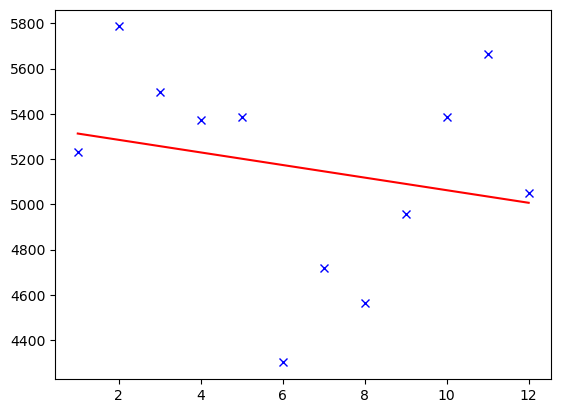

In [20]:
plot_x_vs_yy(X, y, in_sample_pred)

## Predict out-of-sample

In [21]:
y_13 = model.predict(pd.Series([3]))
print(f"Mean {target} for the 13th month is {round(y_13.squeeze()/ (60))} minutes.")

Mean duration for the 13th month is 88 minutes.


# Export in-sample predictions

In [22]:
in_sample_pred.to_csv(output, index=False)